# Localized sea surface temperature (SST) and precipitation variations following volcanic eruptions with a Volcanic Explosivity Index (VEI) greater than 3 in the Aleutian Arc, Hawaiian-Emperor seamount chain, and the greater Ring of Fire

**Michael Cox | Texas A&M University | October 12, 2022**

---

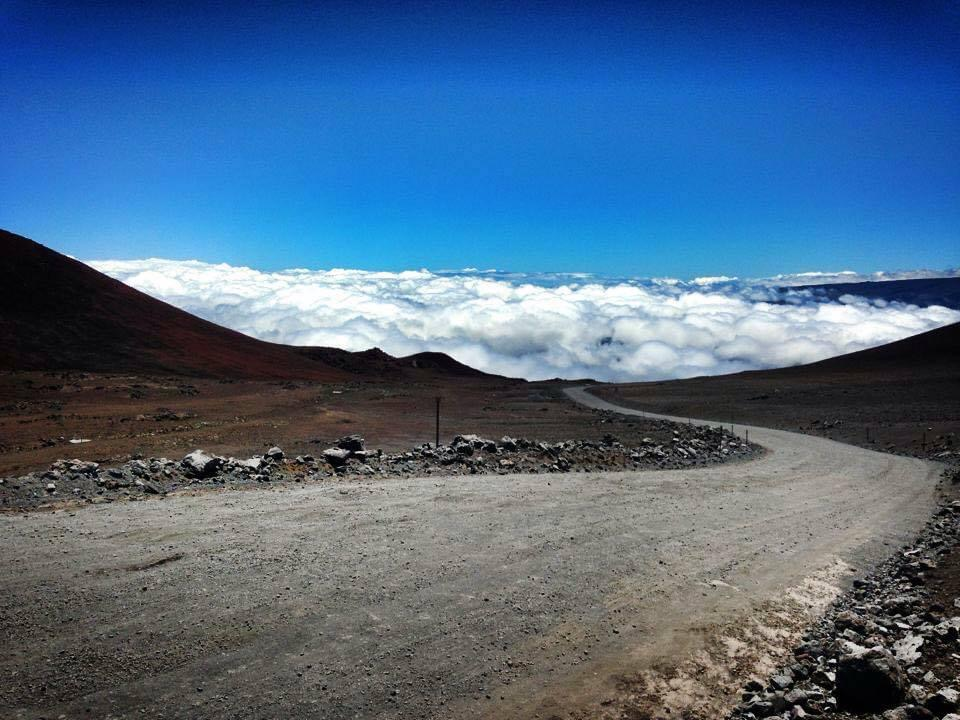

Mauna Kea, Hawaii

## Abstract.

Volcanoes are integral to the natural world, serving as powerful agents of both destruction and creation. While their immense power is often associated with volatility and devastation, volcanoes also play a pivotal role in shaping the environment. They contribute to the formation of new landmasses, influencing ecosystems and the development of life as we know it. My fascination with volcanoes began during my time in the U.S. Army, when I first encountered the majestic Mount Rainier dominating the landscape during basic training. Since then, I have worked in various austere environments across the globe, yet I am consistently drawn to locations where volcanoes are present. One of my most memorable experiences was during a military training exercise on the Big Island of Hawaii, where my team and I had the opportunity to hike to the summit of Mauna Kea. The Mauna Kea Observatories, perched at an elevation of 13,796 feet, offered a breathtaking view above the clouds, an experience I vividly remember from 2013.

For my data analysis project, I have chosen to investigate the relationship between volcanic activity, sea surface temperature, and precipitation patterns. Specifically, I will employ a one-way ANOVA design to examine data from volcanic eruptions with a Volcanic Explosivity Index (VEI) of 3 or higher. My experimental setup will include a control group (Group A), consisting of buoy data collected from locations distant from the selected volcanic eruptions. The buoy data I will use is sourced from the National Data Buoy Center (NDBC), which can be accessed at https://www.ndbc.noaa.gov/.

- For further reading on VEI, visit https://www.usgs.gov/media/images/volcanic-explosivity-index-vei-a-numeric-scale-measures-t
- interactive map from USGS of volcano hazards at: https://www.usgs.gov/programs/VHP
- interactive map from National Data Buoy Center at: https://www.ndbc.noaa.gov/

## Data Sources:

**1. The Smithsonian Institution National Museum of Natural History Global Volcanism Program** (https://volcano.si.edu/volcanolist_holocene.cfm) 

- The Global Volcanism Program database currently contains 1,332 volcanoes with eruptions during the Holocene period (approximately the last 10,000 years). 

- GVP_Volcano_List_Holocene.csv; gvp_confirmed_eruptions_holocene1.csv

**2. The National Oceanic and Atmospheric Administration (NOAA) Physical Sciences Laboratory (PSL) Extended Reconstructed Sea Surface Temperature (SST)** (https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html)

- This dataset is a global monthly SST analysis from 1854 to the present derived from ICOADS data with missing data filled in by statistical methods.

- NOAA Extended Reconstructed SST, V5; noaa_sst_v5.nc

**3. The Global Precipitation Climatology Centre (GPCC)** (https://downloads.psl.noaa.gov/Datasets/gpcc/monitor/)

- This dataset provides global precipitation analysis and is maintained by NOAA's Earth System Research Laboratory.

- precip_v2020.nc; precip.monitor.mon.total.1x1.v2020.nc

## Experimental Design and Analysis

**Null Hypothesis (H0)**: Localized sea surface temperatures will not change from the result of a major volcanic eruption with a VEI ≥ 3.

**Alternate Hypothesis (Ha)**: Localized sea surface temperatures will decrease from the result of a volcanic eruption with a volcanic explosivity index VEI ≥ 3.

**Hypothesis (H)**: Localized sea surface temperatures will increase from the result of a volcanic eruption with a VEI $\geq$ 3.

**Groups**: A (Mauana Loa VEI 0) (also our control group); B (Novarupta VEI 6); C (St. Helens VEI 5); D (Kasatochi VEI 4); E (Pavlof VEI 3).

**Replicates**: values are monthly sea surface temperatures (SST, celsius) for periods of 1.) Eruption Day Minus 1 Month, 2.) Eruption Day, 3.) Eruption Day Plus 1 Month.

This is a Natural Experiment; I will be using observation only by testing observations and response variables and not manipulating variables.

Curiosity for whether or not the explosiveness of volcanoes impacts natural processes such as sea surface temperature and precipitation. 

My goal is to process geological data on volcanoes, sea surface temperature, and precipitation, and to and perform a one-way analysis of variance ANOVA table design to see whether the VEI size of volcanoes impacts our temperature or precipitation values.  

### Groups 

**<u>A</u>** - (control group) - Mauna Loa, VEI 0, March 1984

**<u>B</u>** - Novarupta, VEI 6, June 1912

**<u>C</u>** - St. Helens, VEI 5, March 1980

**<u>D</u>** - Kasatochi, VEI 4, August 2008

**<u>E</u>** - Pavlov, VEI 3, May 2014

## Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns 
import netCDF4
import cmocean.cm as cmo
import cartopy  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import xarray as xr  
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore') # clean up the warnings 

# check versions
print('Version Check: ', 'numpy: ', np.__version__, '| pandas: ', pd.__version__, '| matplotlib: ', matplotlib.__version__, '| cartopy: ', cartopy.__version__, '| netCDF4: ', netCDF4.__version__)

Version Check:  numpy:  1.26.4 | pandas:  2.2.3 | matplotlib:  3.9.2 | cartopy:  0.22.0 | netCDF4:  1.6.2


## Load the Volcanic Data

In [8]:
# Global Volcanism Program (GVP) from The Smithsonian Institution National Museum of Natural History, Holocene 
gvp_volcano_data = pd.read_csv('data\\GVP_Volcano_List_Holocene.csv', parse_dates=[5], index_col=[5], skiprows=[0], na_values='NaN')
gvp_volcano_data.head()

Volcano Number               Volcano Name  Country  \
Last Known Eruption                                                       
8300 BCE                     210010  West Eifel Volcanic Field  Germany   
4040 BCE                     210020            Chaine des Puys   France   
Unknown                      210030        Olot Volcanic Field    Spain   
3600 BCE                     210040   Calatrava Volcanic Field    Spain   
Unknown                      211004               Colli Albani    Italy   

                    Primary Volcano Type   Activity Evidence  \
Last Known Eruption                                            
8300 BCE                         Maar(s)      Eruption Dated   
4040 BCE                    Lava dome(s)      Eruption Dated   
Unknown              Pyroclastic cone(s)   Evidence Credible   
3600 BCE             Pyroclastic cone(s)      Eruption Dated   
Unknown                          Caldera  Evidence Uncertain   

                                             Region       Subregion  Latitude  \
Last Known Eruption                                                             
8300 BCE             Mediterranean and Western Asia  Western Europe    50.170   
4040 BCE             Mediterranean and Western Asia  Western Europe    45.775   
Unknown              Mediterranean and Western Asia  Western Europe    42.170   
3600 BCE             Mediterranean and Western Asia  Western Europe    38.870   
Unknown              Mediterranean and Western Asia           Italy    41.730   

                     Longitude  Elevation (m)  \
Last Known Eruption                             
8300 BCE                  6.85            600   
4040 BCE                  2.97           1464   
Unknown                   2.53            893   
3600 BCE                 -4.02           1117   
Unknown                  12.70            949   

                                   Dominant Rock Type  \
Last Known Eruption                                     
8300 BCE                                      Foidite   
4040 BCE                        Basalt / Picro-Basalt   
Unknown              Trachybasalt / Tephrite Basanite   
3600 BCE                        Basalt / Picro-Basalt   
Unknown                                       Foidite   

                                                 Tectonic Setting  
Last Known Eruption                                                
8300 BCE                   Rift zone / Continental crust (>25 km)  
4040 BCE                   Rift zone / Continental crust (>25 km)  
Unknown                   Intraplate / Continental crust (>25 km)  
3600 BCE                  Intraplate / Continental crust (>25 km)  
Unknown              Subduction zone / Continental crust (>25 km)

## Load Sea Surface Temperature (SST) Data 

In [10]:
# National Oceanic and Atmospheric Administration (NOAA) Physical Sciences Laboratory Extended Reconstructed Sea Surface Temperature (ERSST).
noaa_sst_data = netCDF4.Dataset('data\\noaa_sst_v5.nc')  # monthly means okay since I will go off of yearly means
print(noaa_sst_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    citation: Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.
    comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    Conventions: CF-1.2
    institution: This version written at NOAA/ESRL PSD: obtained from NOAA/NESDIS/National Climatic Data Center
    key

## Load Precipitation Data 

In [18]:
# The Global Precipitation Climatology Centre (GPCC) maintained by NOAA's Earth System Research Laboratory (ESRL)
gpcc_precip_data = netCDF4.Dataset('data\\precip_v2020.nc')
print(gpcc_precip_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: GPCP 1x1 Precipitation Monitoring
    Conventions: CF-1.0
    history: CAS Jul 2021
    platform: Observation
    source: PSL
    References: https://www.psl.noaa.gov/data/gridded/data.gpcc.html
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested 
to give feed back and to refer to following GPCC publications:
Rudolf, B., H. Hauschild, W. Rueth and U. Schneider (1994)
: Terrestrial Precipitation Analysis: Operational Method and Required
 Density of Point Measurements. In: Global Precipitations and
 Climate Change (Ed. M. Desbois, F. Desalmond), NATO ASI Series I
, Vol. 26, Springer-Verlag, p. 173-186.
Rudolf, B., T. Fuchs, U. Schneider and A. Meyer-Christoffer (2003):
, Introduction of the Global Precipitation Climatolo

## Clean and Restructure Data 

First, I will rename the select column names that I want to use for my analysis. 

In [19]:
# rename() function with columns={} parameters 
gvp_volcano_data.rename(columns={'Volcano Number':'volcano_number', 'Volcano Name':'volcano_name', 'Tectonic Setting':'tectonic_setting', 'Volcano_Number':'volcano_number', 'Primary Volcano Type':'volcano_type', 'Activity Evidence':'activity_evidence', 'Dominant Rock Type':'dominant_rock_type', 'Elevation (m)':'elevation'}, inplace=True)

# inspect newly renamed columns 
gvp_volcano_data.columns

Index(['volcano_number', 'volcano_name', 'Country', 'volcano_type',
       'activity_evidence', 'Region', 'Subregion', 'Latitude', 'Longitude',
       'elevation', 'dominant_rock_type', 'tectonic_setting'],
      dtype='object')

In [20]:
gvp_volcano_data

volcano_number                     volcano_name  \
Last Known Eruption                                                    
8300 BCE                     210010        West Eifel Volcanic Field   
4040 BCE                     210020                  Chaine des Puys   
Unknown                      210030              Olot Volcanic Field   
3600 BCE                     210040         Calatrava Volcanic Field   
Unknown                      211004                     Colli Albani   
...                             ...                              ...   
Unknown                      390120                    Leskov Island   
2016 CE                      390130                       Zavodovski   
1962 CE                      390140              Protector Seamounts   
Unknown                      390829  Mount Haddington Volcanic Field   
Unknown                      390847                         Melville   

                            Country         volcano_type   activity_evidence  \
Last Known Eruption                                                            
8300 BCE                    Germany              Maar(s)      Eruption Dated   
4040 BCE                     France         Lava dome(s)      Eruption Dated   
Unknown                       Spain  Pyroclastic cone(s)   Evidence Credible   
3600 BCE                      Spain  Pyroclastic cone(s)      Eruption Dated   
Unknown                       Italy              Caldera  Evidence Uncertain   
...                             ...                  ...                 ...   
Unknown              United Kingdom        Stratovolcano   Unrest / Holocene   
2016 CE              United Kingdom        Stratovolcano   Eruption Observed   
1962 CE              United Kingdom            Submarine   Eruption Observed   
Unknown                  Antarctica               Shield   Evidence Credible   
Unknown                  Antarctica        Stratovolcano  Evidence Uncertain   

                                             Region  \
Last Known Eruption                                   
8300 BCE             Mediterranean and Western Asia   
4040 BCE             Mediterranean and Western Asia   
Unknown              Mediterranean and Western Asia   
3600 BCE             Mediterranean and Western Asia   
Unknown              Mediterranean and Western Asia   
...                                             ...   
Unknown                                  Antarctica   
2016 CE                                  Antarctica   
1962 CE                                  Antarctica   
Unknown                                  Antarctica   
Unknown                                  Antarctica   

                                                 Subregion  Latitude  \
Last Known Eruption                                                    
8300 BCE                                    Western Europe    50.170   
4040 BCE                                    Western Europe    45.775   
Unknown                                     Western Europe    42.170   
3600 BCE                                    Western Europe    38.870   
Unknown                                              Italy    41.730   
...                                                    ...       ...   
Unknown              Antarctica and South Sandwich Islands   -56.656   
2016 CE              Antarctica and South Sandwich Islands   -56.300   
1962 CE              Antarctica and South Sandwich Islands   -55.912   
Unknown              Antarctica and South Sandwich Islands   -64.150   
Unknown              Antarctica and South Sandwich Islands   -62.020   

                     Longitude  elevation                dominant_rock_type  \
Last Known Eruption                                                           
8300 BCE                 6.850        600                           Foidite   
4040 BCE                 2.970       1464             Basalt / Picro-Basalt   
Unknown                  2.530        893  Trachybasalt / Tephrite Basanit

Next, I'll perform some quick analysis on my volcano dataset, starting with a histogram plot of the different type of volcanoes relevant to the Holocene period. This will demonstrate the frequency of each type of volcanic eruption during this period of time. 

From this, we can see that the top five most prevelant volcanic eruption type during the Holocene was the Stratovolcano (most frequent), followed next by Submarine, Shield, Pyroclastic Cone(s), and Calderas. Many other types of volcanoes exist, however I will focus on where the data are primarily located.  

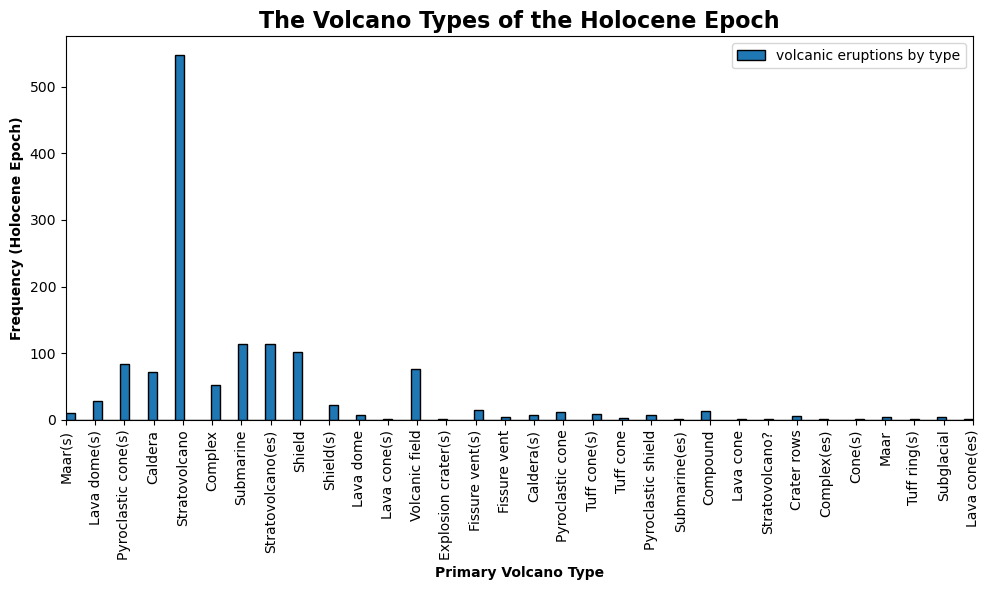

In [21]:
# histogram of volcano types during holocene 
fig = plt.figure(figsize=(10,6))
gvp_volcano_data.volcano_type.hist(bins=100, alpha=1, ec='k', label='volcanic eruptions by type', grid=False)  # linestyle and matplotlib review from: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
# clean the graph and save fig               
plt.xlabel('Primary Volcano Type', weight='bold') 
plt.ylabel('Frequency (Holocene Epoch)', weight='bold')  
plt.title('The Volcano Types of the Holocene Epoch', weight='bold', size=16)
plt.xlim('Maar(s)', 'Lava cone(es)')
plt.xticks(rotation=90, size=10)
plt.legend()
plt.tight_layout()
#plt.savefig('dap3_figure7_Cox.pdf')
#plt.close('all')

In [22]:
gvp_volcano_data.describe() # describe excludes all categorical data 

volcano_number     Latitude    Longitude    elevation
count     1332.000000  1332.000000  1332.000000  1332.000000
mean    297074.433183    13.767253    18.590915  1690.610360
std      49510.492153    31.605482   113.608744  1612.817715
min     210010.000000   -78.500000  -179.970000 -5700.000000
25%     261065.000000    -7.202000   -83.914000   700.000000
50%     290335.500000    13.665000    36.225000  1484.500000
75%     343012.500000    40.676750   131.284250  2422.000000
max     390847.000000    85.608000   179.580000  6879.000000

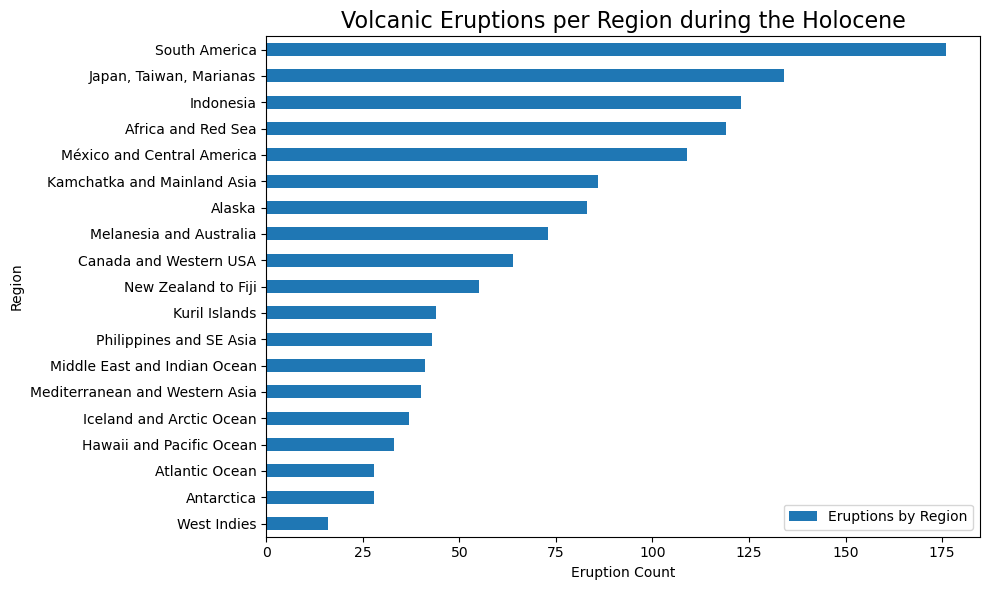

In [23]:
# plot the volcanic eruptions per region
fig = plt.figure(figsize=(10,6))
gvp_volcano_data.groupby('Region').volcano_name.count().sort_values().plot.barh(label='Eruptions by Region', alpha=1)
plt.title('Volcanic Eruptions per Region during the Holocene', size=16)
plt.xlabel('Eruption Count')
plt.legend()
plt.tight_layout()

Quick analysis shows that most of the recorded volcanic eruptions since the Holocene have been Stratovolcanoes, followed by Submarine, Shield, and Pyroclastic cones and Calderas. This infers that most of my data should focus on stratovolcanoes, submarine volcanoes, or any of these top five types.

But, alas, I have already found some issues with my data. My volcano data set does not contain the Volcanic Explosivity Index, or VEI. This will be a factor for my experiment and I need to have it for further analysis. 

The dates are also in BCE and CE, this will be an issue that needs resolved, and will be my next step. 

How to deal with the BCE and CE dates? My initial solution was to create a new dataframe that does not index columns but does parse dates. Below was my initial solution. 

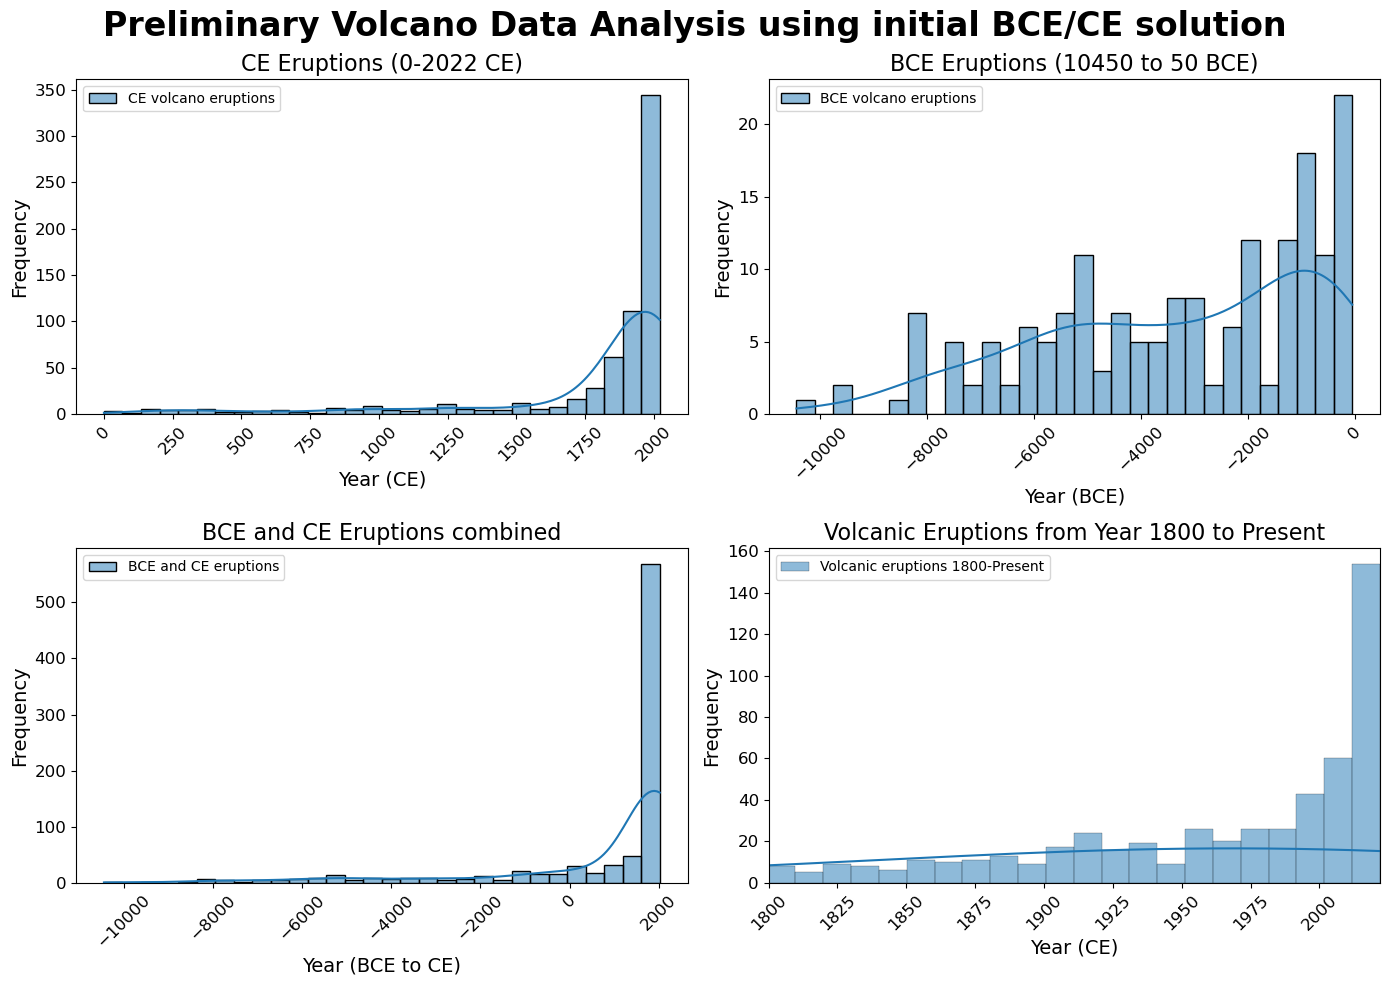

In [24]:
df_volcano = pd.read_csv('data\\GVP_Volcano_List_Holocene.csv', skiprows=[0], parse_dates=[5])

# I came across this method looking for a way to work with dates in BCE and CE
# I tried other methods to no avail with using BCE and CE, but I'm sure other methods are more efficient 
# from SO at the following: https://stackoverflow.com/questions/44717492/how-to-parse-years-with-bce-ce-suffix-in-python
BCE = [i for i in df_volcano['Last Known Eruption'] if 'BCE' in i]  # looks for BCE  
BCE = [x.strip(' BCE') for x in BCE]  # removes string BCE
BCE = list(map(int, BCE))  # defined as integers
BCE = [ -x for x in BCE]  # add minus sign to BCE years
CE = [i for i in df_volcano['Last Known Eruption'] if ' CE' in i]
CE = [x.strip(' CE') for x in CE]
CE = list(map(int, CE))  
mergedlist = BCE + CE  # merges the BCE and the CE integers to one list

# setting my plots for time analysis 
# gallery ideas at https://seaborn.pydata.org/generated/seaborn.histplot.html

# CE eruptions only 
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(221)
sns.histplot(CE, bins=30, kde=True, label='CE volcano eruptions')
#ax.hist(CE, bins=20, label='CE volcano eruptions', color='b', lw=3)
ax.set_xlabel('Year (CE)', fontsize=14)
ax.set_ylabel('Frequency', size=14)
ax.set_title('CE Eruptions (0-2022 CE)', fontsize=16)
ax.legend()
plt.xticks(rotation=45,size=12), plt.yticks(size=12)

# BCE eruptions only 
ax2 = fig.add_subplot(222)
#ax2.hist(BCE, bins=20, label='BCE volcano eruptions', color='b', lw=3)
sns.histplot(BCE, bins=30, kde=True, label='BCE volcano eruptions')
ax2.set_xlabel('Year (BCE)', fontsize=14)
ax2.set_ylabel('Frequency', size=14)
ax2.set_title('BCE Eruptions (10450 to 50 BCE)', fontsize=16)
plt.xticks(rotation=45, size=12)  
ax2.legend()
plt.yticks(size=12)

# all eruptions, BCE and CE combined 
ax3 = fig.add_subplot(223)
sns.histplot(mergedlist, bins=30, kde=True, label='BCE and CE eruptions')
ax3.set_xlabel('Year (BCE to CE)', size=14)
ax3.set_ylabel('Frequency', size=14)
ax3.set_title('BCE and CE Eruptions combined', fontsize=16)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
ax3.legend()

# plot of 1900 to present or time slice of choice 
ax4 = fig.add_subplot(224)
sns.histplot(CE, bins=200, kde=True, label='Volcanic eruptions 1800-Present')    # https://seaborn.pydata.org/generated/seaborn.histplot.html
ax4.set_xlabel('Year (CE)', fontsize=14)
ax4.set_ylabel('Frequency', size=14)
ax4.set_title('Volcanic Eruptions from Year 1800 to Present', fontsize=16)
ax4.set_xlim(1800, 2022)
plt.xticks(rotation=45, size=12)  
ax4.legend()
plt.yticks(size=12)

# final cleanup 
plt.suptitle('Preliminary Volcano Data Analysis using initial BCE/CE solution', color='k', weight='bold',  size=24)
plt.tight_layout()
#plt.savefig('dap3_figure8_Cox.pdf')

A closer look at my data tells me that I want to remove any unconfirmed eruptions, therefore I will create a dataset that only shows confirmed eruptions of the Holocene. I downloadeded and filtered data from the Smithsonian GVP site to only get confirmed eruptions from https://volcano.si.edu/search_eruption.cfm 

In [25]:
# issues with encoding resolved by using 'encoding='unicode_escape' function from SO source: https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s 
confirmed_eruptions = pd.read_csv('data\\gvp_confirmed_eruptions_holocene1.csv', parse_dates=[8], na_values='NaN', index_col=[8], skiprows=[0,0], encoding='unicode_escape')
# now we have our data in years going from September 2021 back to 10,060 years ago! 

confirmed_eruptions # notice we indexed by Start Year, this removes the need to manually code a fix to the BCE and CE dates. 

Volcano Number         Volcano Name  Eruption Number  \
Start Year                                                         
 2021               332010              Kilauea            22416   
 2021               312030               Pavlof            22411   
 2021               284170                Pagan            22409   
 2021               311120         Great Sitkin            22401   
 2021               312070           Veniaminof            22393   
...                    ...                  ...              ...   
-9310               313030              Redoubt            20290   
-9450               327812             Red Hill            22196   
-9700               327812             Red Hill            22194   
-9850               327812             Red Hill            22193   
-10060              324020  Craters of the Moon            21101   

             Eruption Category                 Area of Activity  VEI  \
Start Year                                                             
 2021       Confirmed Eruption                              NaN  0.0   
 2021       Confirmed Eruption                              NaN  2.0   
 2021       Confirmed Eruption                              NaN  2.0   
 2021       Confirmed Eruption                              NaN  2.0   
 2021       Confirmed Eruption                              NaN  1.0   
...                        ...                              ...  ...   
-9310       Confirmed Eruption                              NaN  NaN   
-9450       Confirmed Eruption              Zuni Salt Lake maar  NaN   
-9700       Confirmed Eruption  2.5 km radius of Zuni Salt Lake  NaN   
-9850       Confirmed Eruption                      Cerro Pomo?  NaN   
-10060      Confirmed Eruption                      Sunset cone  0.0   

           VEI Modifier Start Year Modifier  Start Year Uncertainty  \
Start Year                                                            
 2021               NaN                 NaN                     NaN   
 2021               NaN                 NaN                     NaN   
 2021               NaN                 NaN                     NaN   
 2021               NaN                 NaN                     NaN   
 2021               NaN                 NaN                     NaN   
...                 ...                 ...                     ...   
-9310               NaN                 NaN                   300.0   
-9450               NaN                 NaN                   400.0   
-9700               NaN                 NaN                   450.0   
-9850               NaN                 NaN                   500.0   
-10060              NaN                 NaN                     NaN   

            Start Month  ...       Evidence Method (dating)  \
Start Year               ...                                  
 2021               9.0  ...         Observations: Reported   
 2021               8.0  ...         Observations: Reported   
 2021               7.0  ...         Observations: Reported   
 2021               5.0  ...         Observations: Reported   
 2021               2.0  ...         Observations: Reported   
...                 ...  ...                            ...   
-9310               0.0  ...          Sidereal: Varve Count   
-9450               NaN  ...  Isotopic: Cosmic Ray Exposure   
-9700               NaN  ...  Isotopic: Cosmic Ray Exposure   
-9850               NaN  ...  Isotopic: Cosmic Ray Exposure   
-10060              NaN  ...   Isotopic: 14C (uncalibrated)   

            End Year Modifier  End Year End Year Uncertainty End Month  \
Start Year                                                               
 2021                       >    2022.0                  NaN       8.0   
 2021                       >    2022.0                  NaN       8.0   
 2021                     NaN    2021.0                  NaN       9.0   
 2021                       >    2022.0                  NaN       8.0   
 2

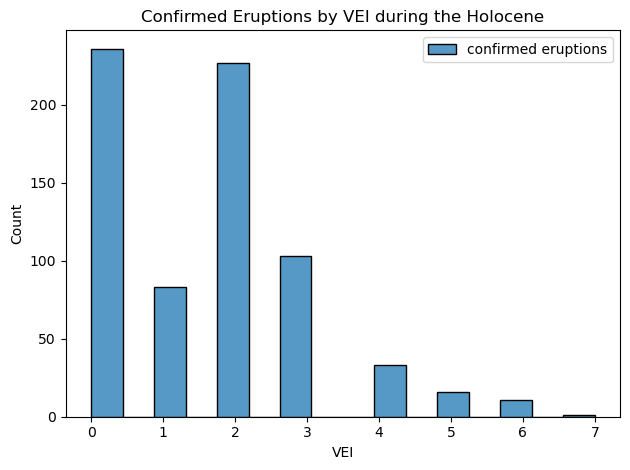

In [26]:
# rename the columns I need
confirmed_eruptions = confirmed_eruptions.rename(columns={'Volcano Name':'volcano_name','Start Month':'start_month', 'End Month':'end_month'})

# check out our variabels by grouping volcano name and VEI
temp_confirmed = confirmed_eruptions.groupby('VEI')
temp_confirmed
temp_confirmed.get_group(4) # use to check for VEI categories

sns.histplot(confirmed_eruptions.VEI, label='confirmed eruptions')
plt.title('Confirmed Eruptions by VEI during the Holocene')
plt.legend()
plt.tight_layout()
#plt.savefig()

## Data Visualization 

### Create two maps comparing all eruptions versus confirmed eruptions only  

Text(0.5, 1.0, 'All Holocene Volcanic Eruptions')

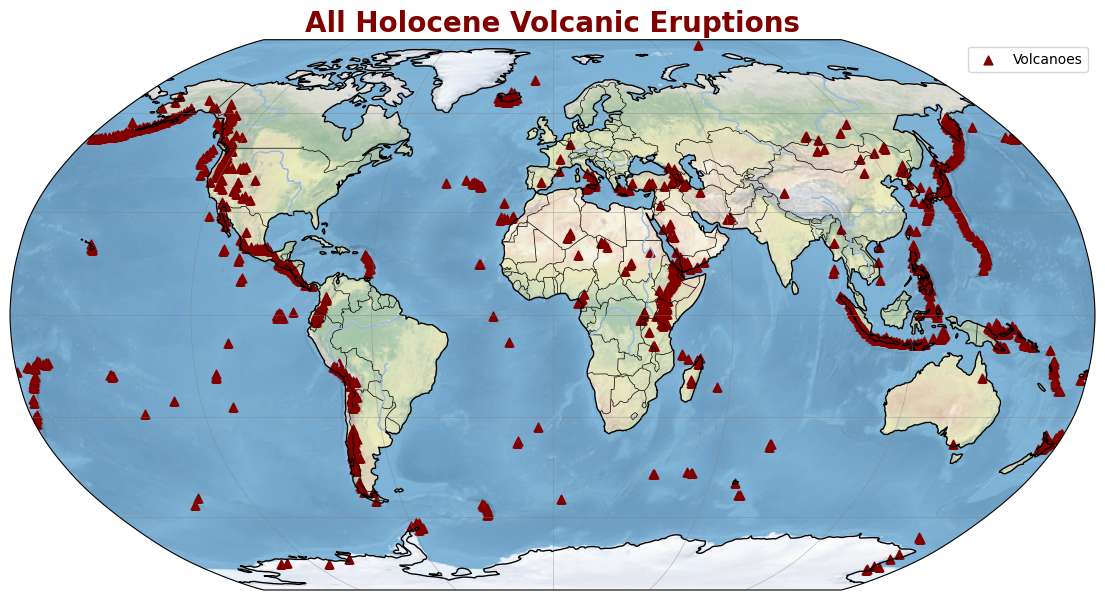

In [27]:
# Holocene Eruptions Map 
# checking and setting geo data for all eruptions, 
df_lat = gvp_volcano_data['Latitude']
df_lon = gvp_volcano_data['Longitude']
lon_max = gvp_volcano_data['Longitude'].max()      # 179.58
lon_min = gvp_volcano_data['Longitude'].min()      # -179.97
lon_central = gvp_volcano_data['Longitude'].mean() # 18.5909
lat_max = gvp_volcano_data['Latitude'].max()       # 85.608
lat_min = gvp_volcano_data['Latitude'].min()       # -78.5
lat_central = gvp_volcano_data['Latitude'].mean()  # 13.767

# # for high res (after plotting course res)
# #land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['land'])
# #ocean_10m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['water'])
# #ax.add_feature(ocean_10m)        
# #ax.add_feature(land_10m)

plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())  # setting at default Robinson instead of assigning central lon
gl = ax.gridlines(linewidth=.5, color='gray', alpha=.5, linestyle= '-')

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')                               
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()

# set extent and extending beyond given data for better map // went with global because of the size of datapoints 
#ax.set_extent([lon_min - 30, lon_max + 30, lat_min - 10, lat_max + 10], ccrs.PlateCarree())
ax.set_global()

# our data
plt.scatter(x=df_lon, y=df_lat, color='maroon', marker='^', s=40, label='Volcanoes', transform=ccrs.PlateCarree())  # swap lat and lon
plt.legend()
plt.title('All Holocene Volcanic Eruptions', weight='bold', size=20, color='maroon')
#plt.savefig('dap5_figure1_Cox.pdf') # run twice to bypass warning

Text(0.5, 1.0, 'Confirmed-Only Holocene Volcanic Eruptions')

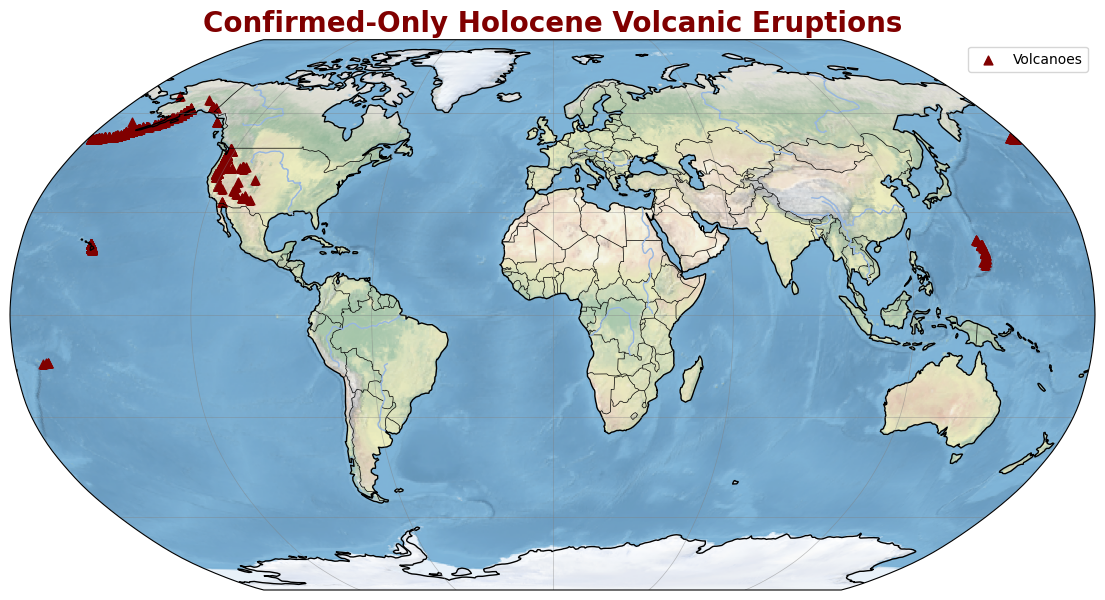

In [28]:
# CONFIRMED ERUPTIONS HOLOCENE

# setting my variables for confirmed eruptions
df_lat2 = confirmed_eruptions['Latitude']          
df_lon2 = confirmed_eruptions['Longitude']        
lon_max2 = confirmed_eruptions['Longitude'].mean()       # -131.1774
lon_min2 = confirmed_eruptions['Longitude'].min()        # -178.794
lon_central2 = confirmed_eruptions['Longitude'].mean()   # -131.177
lat_max2 = confirmed_eruptions['Latitude'].max()         # 65.517
lat_min2 = confirmed_eruptions['Latitude'].min()         # -14.295
lat_central2 = confirmed_eruptions['Latitude'].mean()    # -131.177

plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())  # setting at default Robinson instead of assigning central lon
gl = ax.gridlines(linewidth=.5, color='gray', alpha=.5, linestyle= '-')

# add geographic information
ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(land_10m)
ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(ocean_10m)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()

# set extent and extending beyond given data for better map // went with global because of the size of datapoints 
#ax.set_extent([lon_min - 30, lon_max + 30, lat_min - 10, lat_max + 10], ccrs.PlateCarree())
ax.set_global()

# our data
plt.scatter(x=df_lon2, y=df_lat2, color='maroon', marker='^', s=40, label='Volcanoes', transform=ccrs.PlateCarree())  # swap lat and lon
plt.legend()
plt.title('Confirmed-Only Holocene Volcanic Eruptions', weight='bold', size=20, color='maroon')

#ax = fig.add_subplot(111, projection=proj)
#mappable = ax.contourf(lon, lat, cmap=plt.get_cmap('magma'), transform=pc)

In [29]:
#temp_gvp_volcano_data = gvp_volcano_data.groupby([''])

## Analysis with our Global Sea Surface Temperature (SST) Data  

Text(0.5, 1.0, 'Global SST vs Volcanic Eruptions')

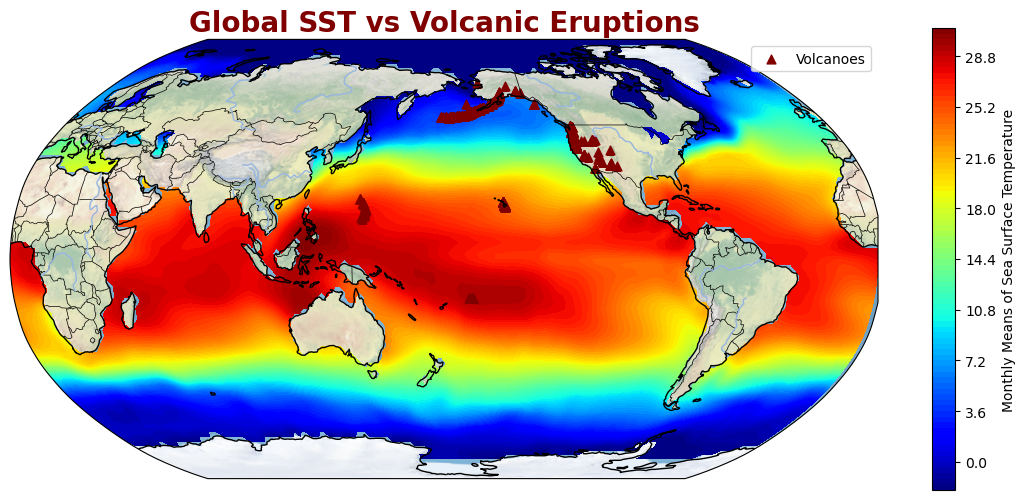

In [30]:
# Sea Surface Temperature analysis with volcanic eruptions 

# set the data that I will use for my map 
sst = noaa_sst_data['sst'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.
sst_lon = noaa_sst_data['lon'][:]
sst_lat = noaa_sst_data['lat'][:]

# set the projection for map 
proj = cartopy.crs.Robinson(central_longitude=180) # Mollweide for global map, lambertconformal for nice fortune cookie map 
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

# choose color map style and projection
ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(sst_lon, sst_lat, sst, 100, cmap=plt.get_cmap('jet'), transform=pc) # try different colormaps ; #add land, Colorbar with proper label and units, Title with nicely formatting date and time

# set geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')                                       # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()

# set extent and extending beyond given data for better map // went with global because of the size of datapoints 
#ax.set_extent([lon_min - 60, lon_max + 30, lat_min - 10, lat_max + 60], ccrs.PlateCarree())
#ax.set_global()

# add colorbars 
fig.colorbar(mappable).set_label('%s' %noaa_sst_data['sst'].long_name)

# plot volcanic eruption data 
plt.scatter(x=df_lon2, y=df_lat2, color='maroon', marker='^', s=40, label='Volcanoes', transform=ccrs.PlateCarree())  # swap lat and lon
plt.legend()
plt.title('Global SST vs Volcanic Eruptions', weight='bold', size=20, color='maroon')
#plt.savefig('dap3_figure2_Cox.pdf')

## Analysis with our Global Precipitation Data   

Text(0.5, 1.0, 'Global Precipitation vs Volcanic Eruptions')

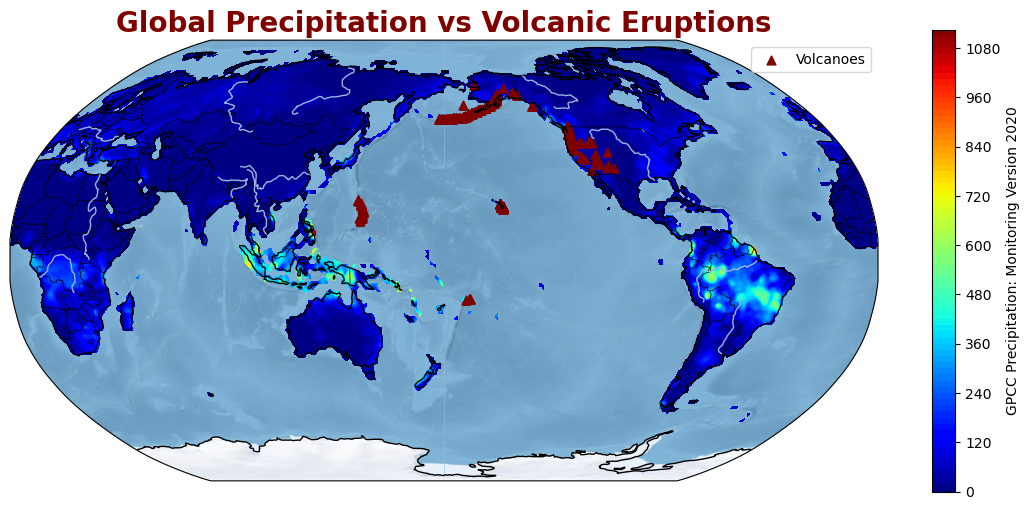

In [31]:
# Precipitation 

# set the data that I will use for my map 
precip = gpcc_precip_data['precip'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.
precip_lon = gpcc_precip_data['lon'][:]
precip_lat = gpcc_precip_data['lat'][:]

# set the projection for map 
proj = cartopy.crs.Robinson(central_longitude=180) # Mollweide for global map, lambertconformal for nice fortune cookie map 
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

# choose color map style and projection
ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(precip_lon, precip_lat, precip, 100, cmap=plt.get_cmap('jet'), transform=pc) # try different colormaps ; #add land, Colorbar with proper label and units, Title with nicely formatting date and time

# set geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')                                       # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()

# set extent and extending beyond given data for better map // went with global because of the size of datapoints 
#ax.set_extent([lon_min - 60, lon_max + 30, lat_min - 10, lat_max + 60], ccrs.PlateCarree())
#ax.set_global()


# add colorbars 
fig.colorbar(mappable).set_label('%s' %gpcc_precip_data['precip'].long_name)


# plot volcanic eruption data 
plt.scatter(x=df_lon2, y=df_lat2, color='maroon', marker='^', s=40, label='Volcanoes', transform=ccrs.PlateCarree())  # swap lat and lon
plt.legend()
plt.title('Global Precipitation vs Volcanic Eruptions', weight='bold', size=20, color='maroon')
#plt.savefig('dap3_figure3_Cox.pdf')

## Combination of Volcanic, SST, and Precip Data)

Text(0.5, 1.0, 'Sea Surface Temp vs Precipitation\n(with Holocene Volcanic Eruptions) ')

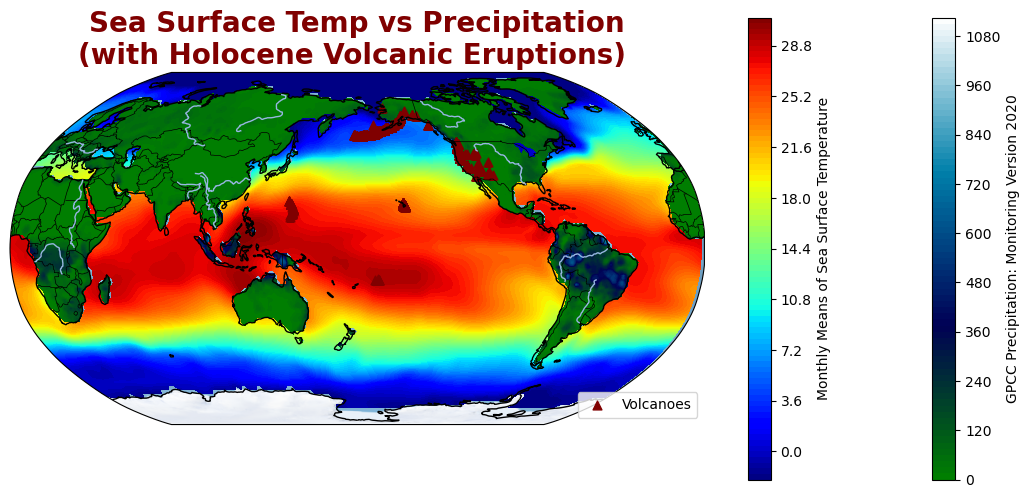

In [32]:
# combination volcano, sst, precip 

# set the data that I will use for my map 
precip = gpcc_precip_data['precip'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.
precip_lon = gpcc_precip_data['lon'][:]
precip_lat = gpcc_precip_data['lat'][:]

# set the projection for map 
proj = cartopy.crs.Robinson(central_longitude=180) # Mollweide for global map, lambertconformal for nice fortune cookie map 
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

# choose color map style and projection    # Also, play around with contour values for smoother or rougher maps, personally I like it at 25 but I might smooth it to 100: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contourf.html
ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(precip_lon, precip_lat, precip, 100, cmap=plt.get_cmap('ocean'), transform=pc) # try different colormaps ; #add land, Colorbar with proper label and units, Title with nicely formatting date and time
mappable2 = ax.contourf(sst_lon, sst_lat, sst, 100, cmap=plt.get_cmap('jet'), transform=pc)

# set geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')                                       # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()

# add colorbars 
fig.colorbar(mappable).set_label('%s' %gpcc_precip_data['precip'].long_name)
fig.colorbar(mappable2).set_label('%s' %noaa_sst_data['sst'].long_name)

# plot volcanic eruption data 
plt.scatter(df_lon2, df_lat2, color='maroon', marker='^', s=40, label='Volcanoes', transform=ccrs.PlateCarree())  # swap lat and lon
plt.legend(loc='lower right')
plt.title('Sea Surface Temp vs Precipitation\n(with Holocene Volcanic Eruptions) ', weight='bold', size=20, color='maroon')
#plt.savefig('dap3_figure4_Cox.pdf')

## Lambert Conformal Projection 

Text(0.5, 1.0, 'Sea Surface Temp vs Precipitation\n(with Holocene Volcanic Eruptions) ')

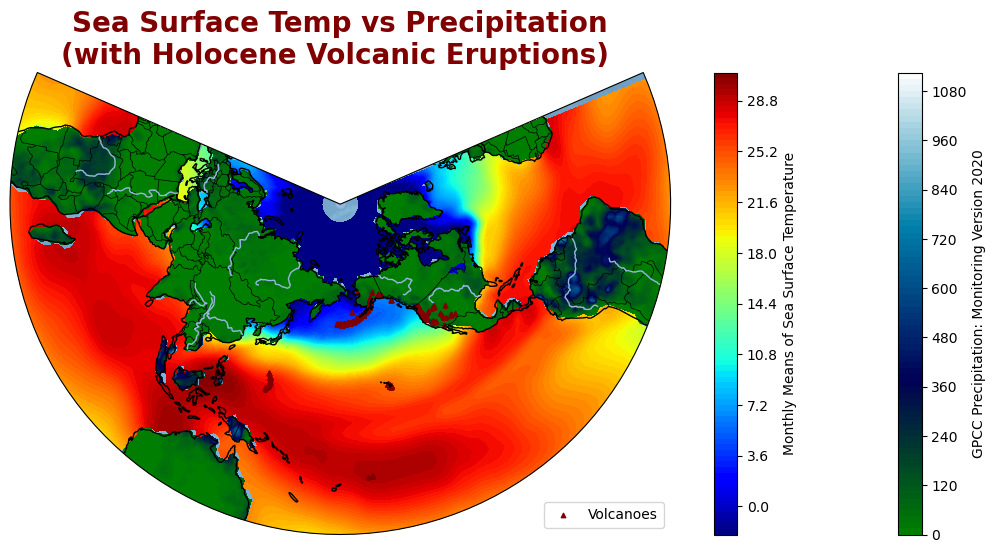

In [33]:
# combination using LambertConformal projection 

# set the data that I will use for my map 
precip = gpcc_precip_data['precip'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.
precip_lon = gpcc_precip_data['lon'][:]
precip_lat = gpcc_precip_data['lat'][:]

# set the projection for map 
proj = cartopy.crs.LambertConformal(central_longitude=180) # Mollweide for global map, lambertconformal for nice fortune cookie map 
pc = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(14,6))

# choose color map style and projection
ax = fig.add_subplot(111, projection=proj)
mappable = ax.contourf(precip_lon, precip_lat, precip, 100, cmap=plt.get_cmap('ocean'), transform=pc) # try different colormaps ; #add land, Colorbar with proper label and units, Title with nicely formatting date and time
mappable2 = ax.contourf(sst_lon, sst_lat, sst, 100, cmap=plt.get_cmap('jet'), transform=pc)
#plt.savefig('ocng655_dap2sst_Cox.pdf')

# set geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')                                       # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.stock_img()

# add colorbars 
fig.colorbar(mappable).set_label('%s' %gpcc_precip_data['precip'].long_name)
fig.colorbar(mappable2).set_label('%s' %noaa_sst_data['sst'].long_name)

# plot volcanic eruption data 
plt.scatter(df_lon2, df_lat2, color='maroon', marker='^', s=10, label='Volcanoes', transform=ccrs.PlateCarree())  # swap lat and lon
plt.legend(loc='lower right')
plt.title('Sea Surface Temp vs Precipitation\n(with Holocene Volcanic Eruptions) ', weight='bold', size=20, color='maroon')
#plt.savefig('dap3_figure5_Cox.pdf')

## Setting my Sample Space of Volcanoes 

Next, I want to create variables for each volcano I need for testing 

I want to organize these to better fit my hypotheses testing (e.g., setting control group to VEI 0 and having one major eruption represent each VEI category, starting with the VEI of 6 going to the VEI of 3. 

Volcanoes to use for my hypothesis of "Major" eruptions and above:

    - A. (Control Group) Mauna Loa, March 1984, VEI 0 
    
    - B. Novarupta, June 1912, VEI 6

    - C. St. Helens, March 1980, VEI 5

    - D. Kasatochi, August 2008, VEI 4

    - E. Pavlof, May 2014, VEI 3

In [34]:
# **Test Cell Below** 
# I used this technique to verify the index for specific volcanoes needed for my experiment  
calbuco = gvp_volcano_data.iloc[[1200]]  # all volcano names are equal to the (reality row in excel) minus 3 
calbuco

volcano_number volcano_name Country   volcano_type  \
Last Known Eruption                                                       
2015 CE                      358020      Calbuco   Chile  Stratovolcano   

                     activity_evidence         Region  \
Last Known Eruption                                     
2015 CE              Eruption Observed  South America   

                                        Subregion  Latitude  Longitude  \
Last Known Eruption                                                      
2015 CE              Southern Chile and Argentina    -41.33    -72.618   

                     elevation            dominant_rock_type  \
Last Known Eruption                                            
2015 CE                   1974  Andesite / Basaltic Andesite   

                                                 tectonic_setting  
Last Known Eruption                                                
2015 CE              Subduction zone / Continental crust (>25 km)

In [35]:
# all volcano names are equal to the (reality row in excel) minus 3 // volcano name // country // type // last eruption
# excel>ctrl+f>type name of volcano>subtract 3 from the row number>equals number needed for code

novarupta_lon = gvp_volcano_data.Longitude[[816]]  # Novarupta, VEI 6, Alaska, June 1912, Caldera
novarupta_lat = gvp_volcano_data.Latitude[[816]]

st_helens_lon = gvp_volcano_data.Longitude[[866]]  # St. Helens, VEI 5, Washington, March 1980, Stratovolcano 
st_helens_lat = gvp_volcano_data.Latitude[[866]]

kasatochi_lon = gvp_volcano_data.Longitude[[771]]  # Kasatochi, VEI 4, Alaska, August 2008, Stratovolcano
kasatochi_lat = gvp_volcano_data.Latitude[[771]]

pavlof_lon = gvp_volcano_data.Longitude[[798]]  # Pavlof, VEI 3, Alaska, May 2014, Stratovolcano
pavlof_lat = gvp_volcano_data.Latitude[[798]] 

mauna_loa_lon = gvp_volcano_data.Longitude[[917]]  # Mauna Loa Hawaii, VEI 0 (Control), March 1984
mauna_loa_lat = gvp_volcano_data.Latitude[[917]]

## Setting the Map Extent and Plotting Specified Volcanoes 

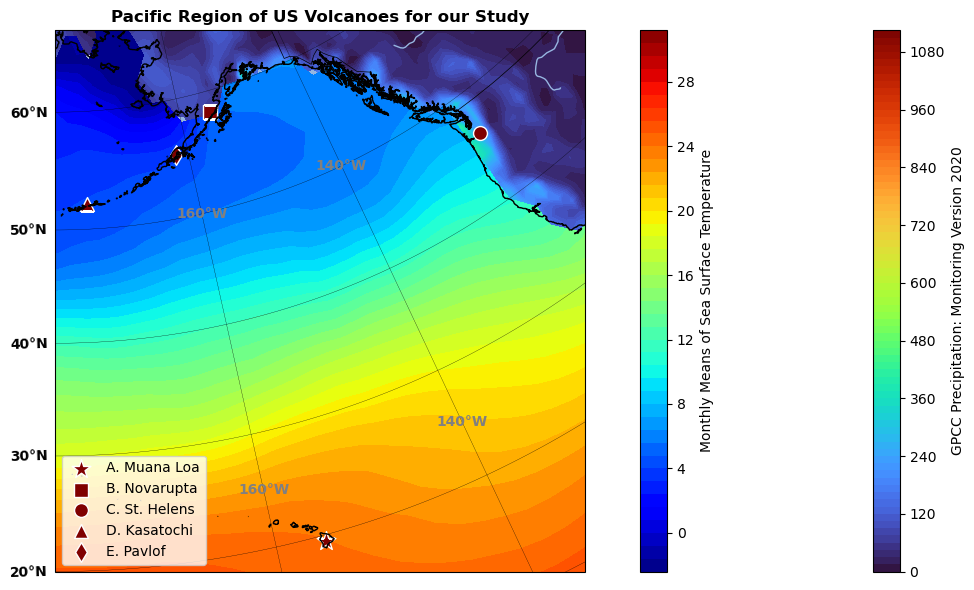

In [36]:
# create plot, try and test different projections
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=180, central_latitude=18))  # revert back if needed to LambertConformal(central_longitude=180, central_latitude=20.0)) looks good
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='k', linestyle='-')  # aplha value makes it somewhat see through
pc = cartopy.crs.PlateCarree()
ax.set_extent([-180, -130, 20, 60], ccrs.PlateCarree())  #(lon, lat) 

# add precipitation data 
mappable3 = ax.contourf(precip_lon, precip_lat, precip, 100, cmap=plt.get_cmap('turbo'), transform=pc) # try different colormaps ; #add land, Colorbar with proper label and units, Title with nicely formatting date and time
# add sst data 
mappable4 = ax.contourf(sst_lon, sst_lat, sst, 50, cmap=plt.get_cmap('jet'), transform=pc)

# add geography
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='10m')  # looks better with resolution='10m', start with course resolution
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)

# add volcanoes, A-E
plt.scatter(mauna_loa_lon, mauna_loa_lat, color='maroon', marker='*', edgecolors='white', s=200, label='A. Muana Loa', transform=ccrs.PlateCarree()) # traingle down
plt.scatter(novarupta_lon, novarupta_lat, color='maroon', marker='s', edgecolors='white', s=100, label='B. Novarupta', transform=ccrs.PlateCarree()) # square 
plt.scatter(st_helens_lon, st_helens_lat, color='maroon', marker='o', edgecolors='white', s=100, label='C. St. Helens', transform=ccrs.PlateCarree()) # circle 
plt.scatter(kasatochi_lon, kasatochi_lat, color='maroon', marker='^', edgecolors='white', s=100, label='D. Kasatochi', transform=ccrs.PlateCarree()) # triangle up
plt.scatter(pavlof_lon, pavlof_lat, color='maroon', marker='d', s=100, label='E. Pavlof', edgecolors='white', transform=ccrs.PlateCarree()) # diamond


# turn gridlines on and off; I couldn't get the labeling the way I wanted, but at least the coordinates are on the map
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -160, -140])  # control where the ticks are
gl.xlabel_style = {'color': 'grey', 'weight':'bold' }  # control how the tick labels look
gl.ylabel_style = {'color': 'k', 'weight': 'bold'}
gl.top_labels = False  # turn off labels where you don't want them
gl.right_labels = False

# add colorbars 
fig.colorbar(mappable3).set_label('%s' %gpcc_precip_data['precip'].long_name)
fig.colorbar(mappable4).set_label('%s' %noaa_sst_data['sst'].long_name)

# clean the plot
plt.title('Pacific Region of US Volcanoes for our Study', weight='bold',)
plt.tight_layout()
plt.legend(loc='lower left')
#plt.savefig('dap3_figure10_Cox.pdf')

Ok, now that I have "zoomed" into our map to isolate our groups of volcanoes, I want to perform some analysis on the means of monthly sea surface temperatures versus volcano group. So, going back to our experimental design:

## Looking Back to our Experimental Design 

**H0** - Localized sea surface temperatures will not change from the result of a major volcanic eruption with a VEI$\geq$3.

**Ha** - Localized sea surface temperatures will decrease from the result of a volcanic eruption with a volcanic explosivity index VEI$\geq$3.  

**H** - Localized sea surface temperatures will increase from the result of a volcanic eruption with a VEI$\geq$3. 

Specifically I need to look at the dates. I need to get the values for eruption dates +- 1 month for each group (each volcano). 

**A** - control group - Mauna Loa VEI 0 - March 1984

**B** - Novarupta, VEI 6 - June 1912  

**C** - St. Helens, VEI 5 - March 1980

**D** - Kasatochi, VEI 4 - August 2008

**E** - Pavlov, VEI 3 - May 2014

In [37]:
sst_mon = netCDF4.Dataset('data\\sst.mon.mean.nc')  # monthly means okay since I will go off of yearly means
print(sst_mon)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: COBE Sea Surface Temperature Analysis
    history: created June 2011 at ESRL/PSD using the grib data from JRA.
    platform: Analyses
    original_source: http://near-goos1.jodc.go.jp/cgi-bin/1997/near_goos_catalog?projectname=NEAR-GOOS
    Conventions: CF-1.2
    institution: NOAA ESRL/PSD
    comment: recent values (w/i last year) may change as dataset is updated. It is a monitoring dataset.
    dataset_title: COBE Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.cobe.html
    dimensions(sizes): lon(360), lat(180), time(1581)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 sst(time, lat, lon)
    groups: 


Further reading on xarray at https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html

## Setting up my Groups A-E by Time of Eruptions and by SST or Precip

I had an issue with my plot using my original precipitation data, so I went to https://www.psl.noaa.gov/data/gridded/index.html and downloaded the most current precip.mon.mean.nc file, and the plot is much better now than before.  

In [38]:
# Read in and transform using xarray package 
# solution to my issues found at SO: https://stackoverflow.com/questions/40256461/reading-time-series-from-netcdf-with-python
noaa_sst_data = xr.open_dataset('data\\noaa_sst_v5.nc')
precip_mon = xr.open_dataset('data\\precip.mon.mean.nc') # newly downloaded from https://downloads.psl.noaa.gov/Datasets/cmap/enh/

# set the latitude and longitude for each volcano
lat1 = 19.475; lon1 = 155.608  # Mauana Loa 19.475 N, 155.608 W
lat2 = 58.229; lon2 = 155.123  # Novarupta using quick Google search: 58.2289° N, 155.1234° W
lat3 = 45.911; lon3 = -125.541 # St. Helens, 45.911004, -125.541127
lat4 = 52.175; lon4 = 175.514  # Kasatochi 52.1752° N, 175.5139° W
lat5 = 55.420; lon5 = 161.893  # Pavlof, 55.4203° N, 161.8931° W

In [160]:
# Mauna Loa 
dsloc1 = noaa_sst_data.sel(lon=lon1, lat=lat1, method='nearest')
dsloc2 = precip_mon.sel(lon=lon1, lat=lat1, method='nearest')
#Novarupta
dsloc3 = noaa_sst_data.sel(lon=lon2, lat=lat2, method='nearest')
dsloc4 = precip_mon.sel(lon=lon2, lat=lat2, method='nearest')
#St Helens
dsloc5 = noaa_sst_data.sel(lon=lon3, lat=lat3, method='nearest')
dsloc6 = precip_mon.sel(lon=lon3, lat=lat3, method='nearest')
#Kasatochi
dsloc7 = noaa_sst_data.sel(lon=lon4, lat=lat4, method='nearest')
dsloc8 = precip_mon.sel(lon=lon4, lat=lat4, method='nearest')
#Pavlof
dsloc9 = noaa_sst_data.sel(lon=lon5, lat=lat5, method='nearest')
dsloc10 = precip_mon.sel(lon=lon5, lat=lat5, method='nearest')

## Plotting for Further Analysis

In [ ]:
# set figure size 
#fig, ax = plt.subplots(552)
fig = plt.figure(figsize=(20,20))

# plot our variabels
ax1 = fig.add_subplot(521)
dsloc1['sst'].plot(color='maroon')
plt.title('Mauana Loa SST', weight='bold', size=20)
ax1.set_xlabel('Time', size=16, weight='bold')
ax1.set_ylabel('Monthly SST (celsius)', weight='bold', size=16)
plt.legend()

ax2 = fig.add_subplot(522)
dsloc2['precip'].plot(color='b', label='Mauna Loa Precip')
plt.title('Muana Loa Precip', weight='bold', size=20)
ax2.set_xlabel('Time', size=16, weight='bold')
ax2.set_ylabel('Monthly Precip Levels', weight='bold', size=16)
plt.legend()

ax3 = fig.add_subplot(523)
dsloc3['sst'].plot(color='maroon', label='Novarupta SST')
plt.title('Novarupta SST', weight='bold', size=20)
ax3.set_xlabel('Time', weight='bold', size=16)
ax3.set_ylabel('Monthly SST (degCelsius)', weight='bold', size=16)
plt.legend()

ax4 = fig.add_subplot(524)
dsloc4['precip'].plot(color='b', label='Novarupta Precip')
plt.title('Novarupta Precip', weight='bold', size=20)
ax4.set_xlabel('Time', weight='bold', size=16)
ax4.set_ylabel('Monthly Precip Levels', weight='bold', size=16)
plt.legend()

ax5 = fig.add_subplot(525)
dsloc3['sst'].plot(color='maroon', label='St Helens SST')
plt.title('St. Helens SST', weight='bold', size=20) # nearest ocean 
ax5.set_xlabel('Time', weight='bold', size=16)
ax5.set_ylabel('Monthly SST (celsius)', weight='bold', size=16)
plt.legend()

ax6 = fig.add_subplot(526)
dsloc6['precip'].plot(color='b', label='St Helens Precip')
plt.title('St. Helens Precip', weight='bold', size=20) # nearest ocean 
ax6.set_xlabel('Time', weight='bold', size=16)
ax6.set_ylabel('Monthly Precip Levels', weight='bold', size=16)
plt.legend()

ax7 = fig.add_subplot(527)
dsloc7['sst'].plot(color='maroon', label='Kasatochi SST')
plt.title('Kasatochi SST', weight='bold', size=20)
ax7.set_xlabel('Time', weight='bold', size=16)
ax7.set_ylabel('Monthly SST (celsius)', weight='bold', size=16)
plt.legend()

ax8 = fig.add_subplot(528)
dsloc8['precip'].plot(color='b', label='Kasatochi Precip')
plt.title('Kasatochi Precip', weight='bold', size=20)
ax8.set_xlabel('Time', size=18)
ax8.set_ylabel('Monthly Precip Levels', weight='bold', size=16)
plt.legend()

ax9= fig.add_subplot(529)
dsloc9['sst'].plot(color='maroon', label='Pavlof SST')
plt.title('Pavlof SST', weight='bold', size=20)
ax9.set_xlabel('Time', size=18)
ax9.set_ylabel('Monthly SST (celsius)', weight='bold', size=16)
plt.legend()

ax10 = fig.add_subplot(5,2,10)
dsloc10['precip'].plot(color='b', label='Pavlof Precip')
plt.title('Pavlof Precip', weight='bold', size=20)
ax10.set_xlabel('Time', size=18)
ax10.set_ylabel('Monthly Precip Levels', weight='bold', size=16)
plt.legend()

# clean and save 
plt.suptitle('DAP5 Figurex; Michael Cox; 332000103 ', weight='bold', size=10)
plt.tight_layout()
#plt.savefig('ocng655_DAP5_figx.pdf')

## Next I want to see the maps for analysis during the eruption times 

In [ ]:
# obtain my values for my ANOVA table 
# more xarray documentation https://docs.digitalearthafrica.org/en/latest/sandbox/notebooks/Frequently_used_code/Working_with_time.html

# Control Group A Mauana Loa sample times
pre_mauana_sst = noaa_sst_data.sel(time=slice('1984-02-25','1984-03-25'))
eday_mauana_sst = noaa_sst_data.sel(time=slice('1984-03-25','1984-04-15'))
post_mauana_sst = noaa_sst_data.sel(time=slice('1984-04-15','1984-05-15'))

# Group B Novarupta sample times 
pre_novarupta_sst = noaa_sst_data.sel(time=slice('1912-05-06','1912-06-06'))
eday_novarupta_sst = noaa_sst_data.sel(time=slice('1912-06-06','1912-07-25'))
post_novarupta_sst = noaa_sst_data.sel(time=slice('1912-07-25','1912-08-25'))

# Group C St Helens sample times 
pre_helens_sst = noaa_sst_data.sel(time=slice('1980-02-18','1980-03-18'))
eday_helens_sst = noaa_sst_data.sel(time=slice('1980-03-18','1980-04-02'))
post_helens_sst = noaa_sst_data.sel(time=slice('1980-04-03','1980-05-18'))

# Group D Kasatochi sample times 
pre_kasa_sst = noaa_sst_data.sel(time=slice('2008-07-07','2008-08-06'))
eday_kasa_sst = noaa_sst_data.sel(time=slice('2008-08-07','2008-09-01'))
post_kasa_sst = noaa_sst_data.sel(time=slice('2008-09-01','2008-10-07'))

# Group E St Pavlof sample times 
pre_pavlof_sst = noaa_sst_data.sel(time=slice('2014-04-15','2014-05-29'))
eday_pavlof_sst = noaa_sst_data.sel(time=slice('2014-05-30','2014-06-15'))
post_pavlof_sst = noaa_sst_data.sel(time=slice('2014-06-15','2014-07-30'))


# SST means Group A Mauna Loa 
pre_mauana_sst.sst.mean()  # 13.824726
eday_mauana_sst.sst.mean() # 13.563925
post_mauana_sst.sst.mean() # 13.875788

# SST means Group B Novarupta
pre_novarupta_sst.sst.mean()  # 13.331262
eday_novarupta_sst.sst.mean() # 13.53181
post_novarupta_sst.sst.mean() # 13.622274

# SST means for Group C St. Helens
pre_helens_sst.sst.mean()  # 13.906736
eday_helens_sst.sst.mean() # 13.77143
post_helens_sst.sst.mean() # 13.705904

# SST means for Group D Kasatochi
pre_kasa_sst.sst.mean()  # 14.385801
eday_kasa_sst.sst.mean() # 14.26738
post_kasa_sst.sst.mean() # 14.110427

# SST Group E Pavlof
pre_pavlof_sst.sst.mean()  # 14.015157
eday_pavlof_sst.sst.mean() # 14.153363
post_pavlof_sst.sst.mean() # 14.381456

## ANOVA techniques applied to DAP

In [42]:
# read data in after making excel based off above information and converting to CSV
df1 = pd.read_csv('data\\ANOVA_DAP5.csv', header=0, index_col=0)
df1

A          B          C          D          E 
group                                                          
Eday -1   13.824726  13.331262  13.906736  14.385801  14.015157
Eday      13.563925  13.531810  13.771430  14.267380  14.153363
Eday +1   13.875788  13.622274  13.705904  14.110427  14.381456

In [43]:
# reshape the data 
groups = ['A', 'B', 'C', 'D', 'E']*3  # 1 because of the number of replicates? 
groups.sort()

# turn into a flattened array of our 40 measurements
data = df1.T.values.flatten() 

# create a new dataframe called new_df1 that is filled with the data from df1 and reshaped  
new_df1 = pd.DataFrame()
new_df1['data'] = data
new_df1['group'] = groups

# create the model
linear_model = ols('data ~ C(group)', data=new_df1).fit()

# run the ANOVA 
table = anova_lm(linear_model)
table

df    sum_sq   mean_sq          F    PR(>F)
C(group)   4.0  1.206026  0.301507  13.229772  0.000528
Residual  10.0  0.227900  0.022790        NaN       NaN

My P-Value is 0.000528 is relatively small meaning that there consists statistically significant differences among our groups. The large F-stat also concludes something is significant. 

## Final Analysis and plots 

In [44]:
df1.rename(columns={'A ':'A', 'B ':'B', 'C ':'C', 'D ': 'D', 'E ': 'E'}, inplace=True)

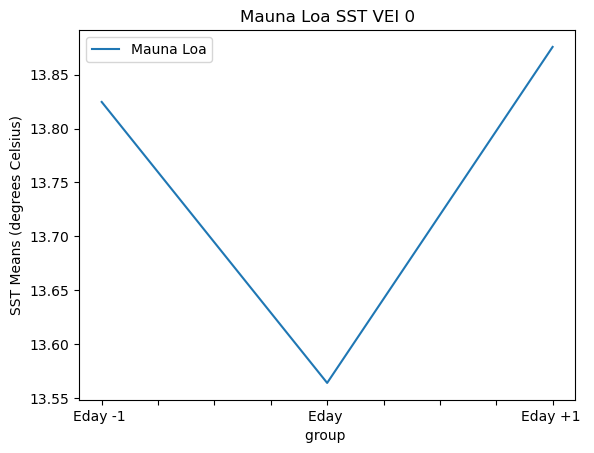

In [45]:
df1.A.plot(label='Mauna Loa')
plt.title('Mauna Loa SST VEI 0')
plt.ylabel('SST Means (degrees Celsius)')
plt.legend()

Explain how the plots look, the control group appears to have cooled off during eruption and raised again back to normal levels previously. This is good to have as our control. 

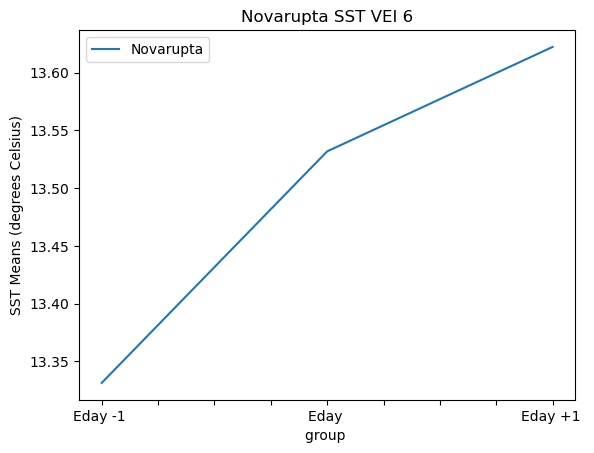

In [46]:
df1.B.plot(label='Novarupta')
plt.title('Novarupta SST VEI 6')
plt.ylabel('SST Means (degrees Celsius)')
plt.legend()

Here, The eruption came and followed the trend of raising sea surface temperatures. 

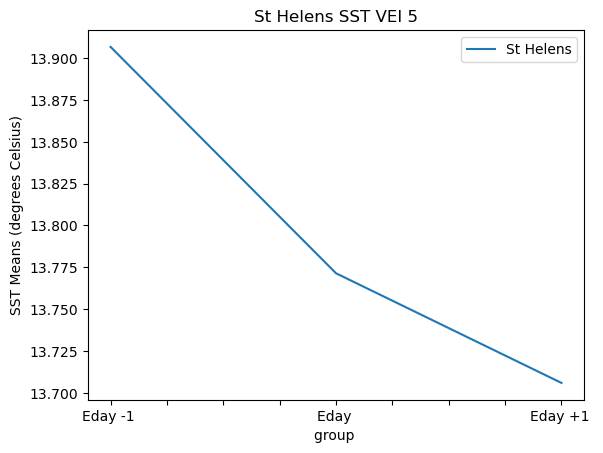

In [47]:
df1.C.plot(label='St Helens')
plt.title('St Helens SST VEI 5')
plt.ylabel('SST Means (degrees Celsius)')
plt.legend()

This St Helens plot shows a stark opposite depiction of Novarupta's response as the waters cool off post eruption. 

To caveat this, I had to get the coordinates from the water directly west of St Helens. 

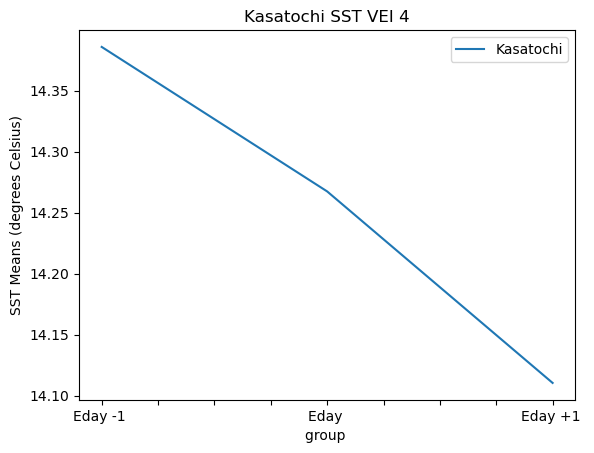

In [48]:
df1.D.plot(label='Kasatochi')
plt.title('Kasatochi SST VEI 4')
plt.ylabel('SST Means (degrees Celsius)')
plt.legend()

The Kasatochi plot follows a similiar trend as the St Helens plot, where the water actually cooled off post eruption. Interesting! 

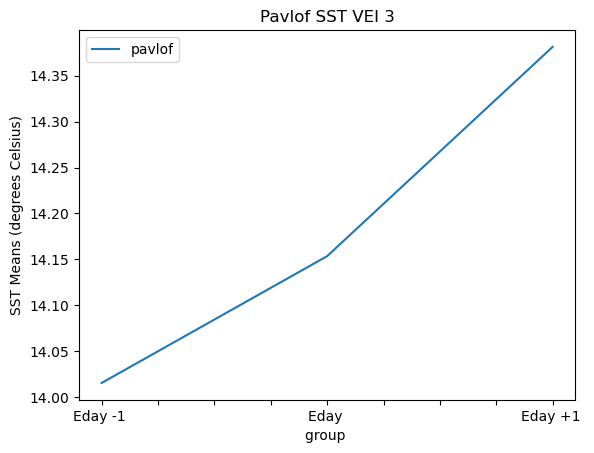

In [49]:
df1.E.plot(label='pavlof')
plt.title('Pavlof SST VEI 3')
plt.ylabel('SST Means (degrees Celsius)')
plt.legend()

Our final plot of our experiment is of Pavlof's eruption. This plot shows that the SST increased up to eruption and beyond. 

In [50]:
# # extras playing around with tabulate 
# # Prepping my ANOVA table data 
# mauna_list_data = [['Novarupta Eruption \n-1 1 month', pre_novarupta_sst.mean()],
#              ['Novarupta Eruption', eday_novarupta_sst.mean()],
#              ['Novarupta Eruption \n+1 1 month', post_novarupta_sst.mean()]]     
# mauna_col_names = ['Group B', 'B SST']  # next, assign the column names as a list     
# print(tabulate(mauna_list_data, headers=mauna_col_names, tablefmt='fancy_grid')) # showindex='always')) # reviewed options such as tablefmt and showindex from: https://www.statology.org/create-table-in-python/